In [1]:
from simplevolumeviewer import VolumeStorage
import nrrd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load data from file (loaded from https://www.embodi3d.com/).

In [3]:
voxeldata, header = nrrd.read('data/CTChest.nrrd')
print('directions:', header['space'])

directions: left-posterior-superior


In [4]:
# Valid direction names:
# left/right - for frontal axis
# posterior/anterior - lateral axis
# superior/inferior - vertical axis

In [5]:
# Creat and init VoxelVolume

In [6]:
VS = VolumeStorage(voxeldata, header['space'],
                   initStandarView = False, # defailt value is True
                   verticalFlip = False # defailt value is True
                  )

In [7]:
# Let's add view point in axial plane (view direction is "superior" and up direction is "anterior") 
# with name "AX"

In [8]:
VS.addView(name = 'AX', viewDirection = 'superior', 
           upDirection = 'anterior',
           verticalFlip = False) # default True

In [9]:
print(VS.getViews().keys())

dict_keys(['AX'])


In [10]:
# Get the view

In [11]:
V = VS.getViews()['AX']

In [12]:
# Check directions

In [13]:
print(V.getDirectionNames())

{'view': 'superior', 'up': 'anterior'}


In [14]:
# Check the index limits along the view axis

In [15]:
print(V.getIndexLimits())

(0, 138)


In [16]:
# Check the current index of the view (after initialization index has the 'central' value)

In [17]:
print(V.getCurrentIndex())

69


In [18]:
# Get current slice

In [19]:
S = V.getCurrentSlice()

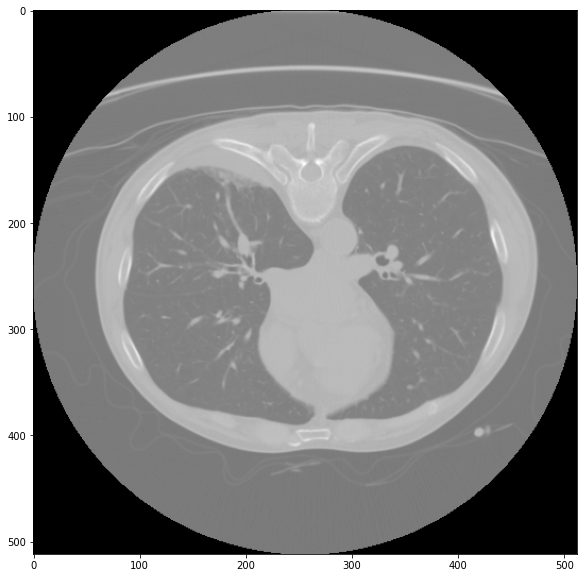

In [20]:
plt.figure(figsize = (10, 10))
plt.imshow(S, cmap = 'gray')
plt.show()

In [21]:
# Image inverted because images are being indexed from top. We can use verticalFlip parameter
# with True value (or skip it).

dict_keys(['AX', 'AX-inverted'])
(0, 138)
69


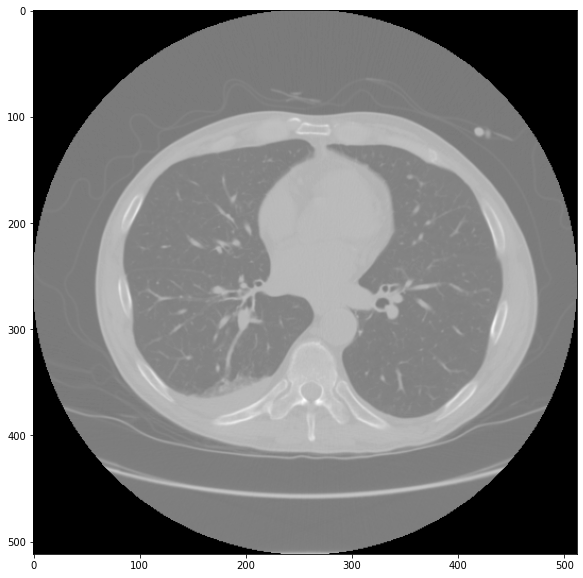

In [22]:
VS.addView(name = 'AX-inverted', viewDirection = 'superior', 
           upDirection = 'anterior')

print(VS.getViews().keys())

V = VS.getViews()['AX-inverted']

print(V.getIndexLimits())
print(V.getCurrentIndex())

S = V.getCurrentSlice()

plt.figure(figsize = (10, 10))
plt.imshow(S, cmap = 'gray')
plt.show()

In [23]:
# Change current index

In [24]:
V.setCurrentIndex(100)
print(V.getCurrentIndex())

100


In [25]:
# Check next/previous slices and iterations

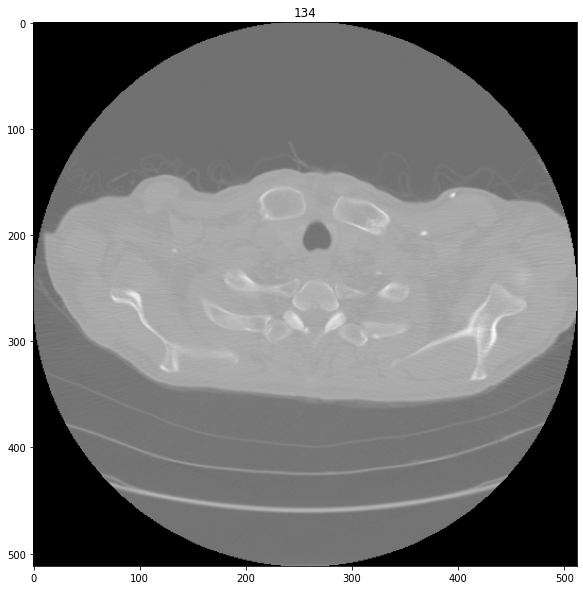

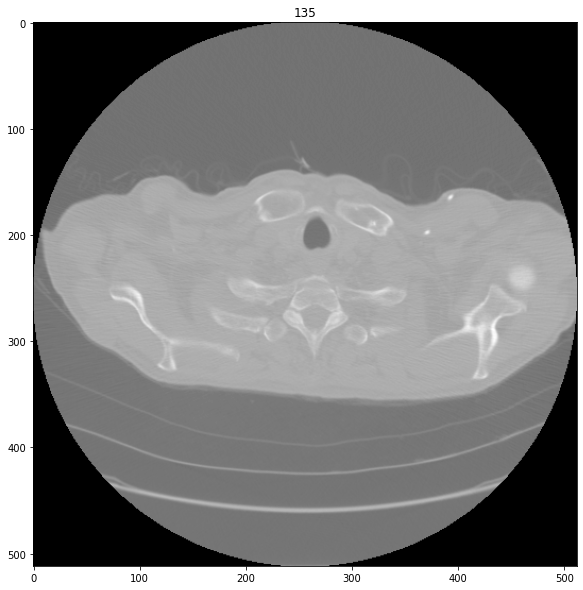

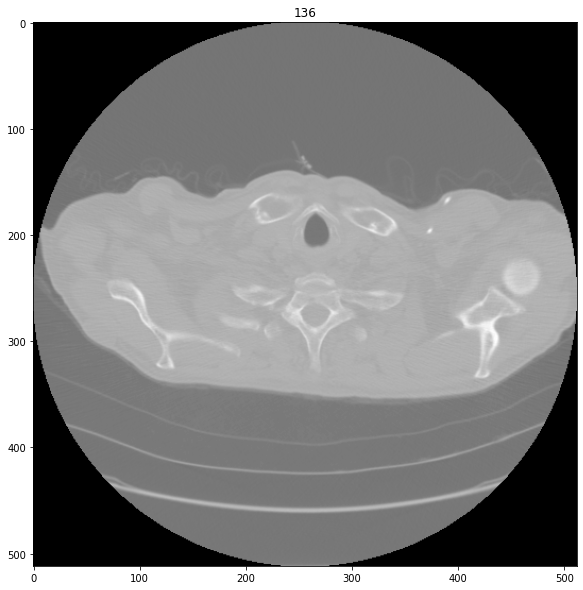

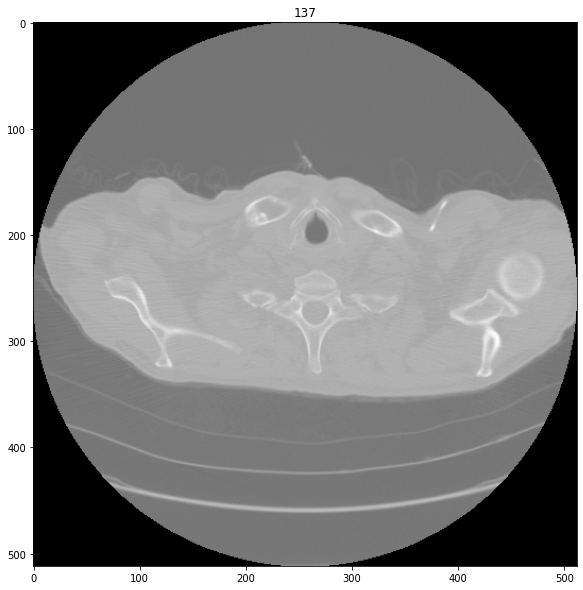

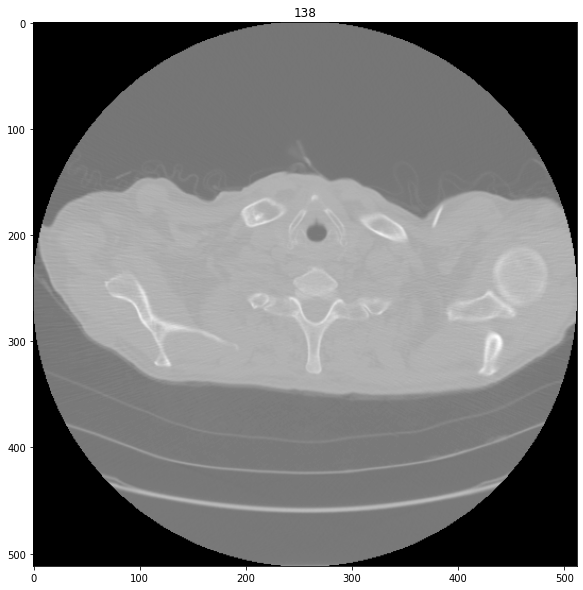

In [26]:
V.setCurrentIndex(133)
while V.hasNext():
    S = V.getNextSlice()
    
    plt.figure(figsize = (10, 10))
    plt.imshow(S, cmap = 'gray')
    plt.title(str(V.getCurrentIndex()))
    plt.show()

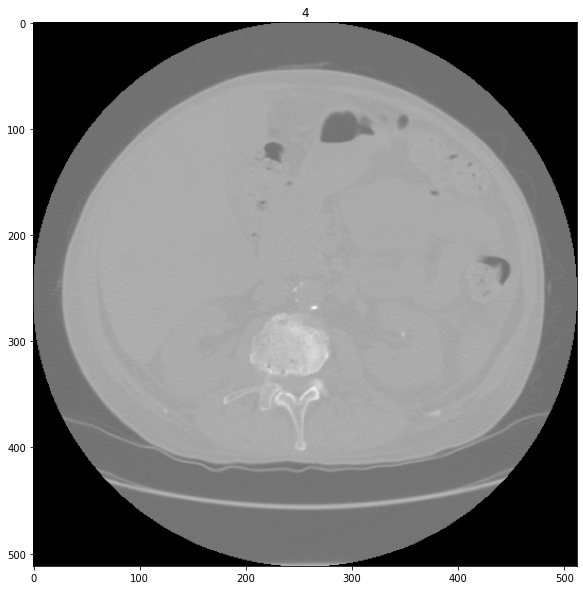

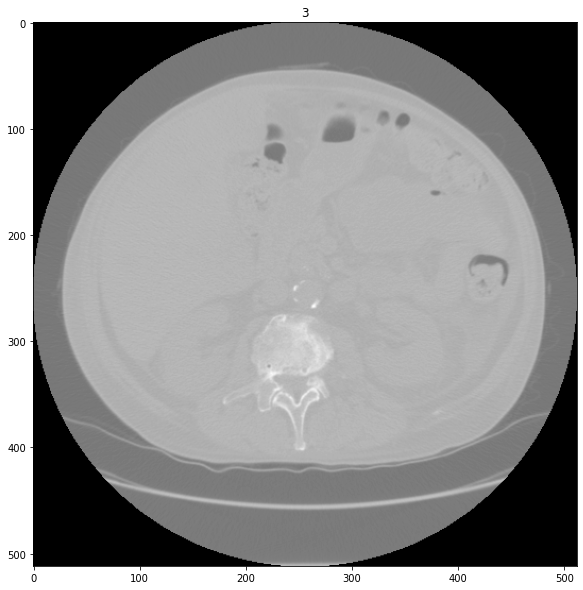

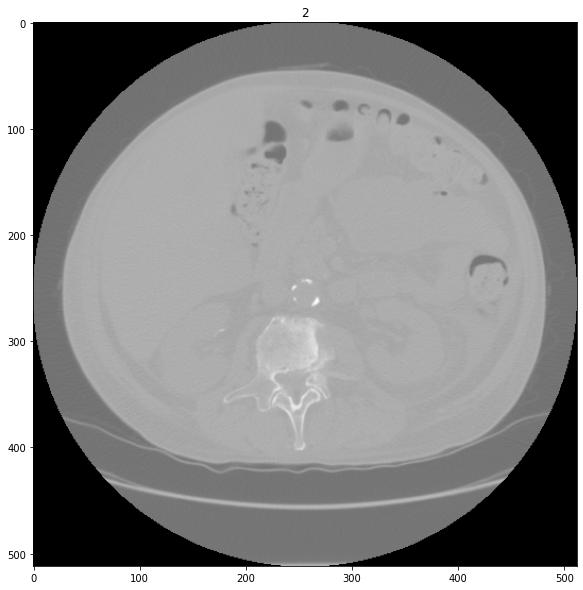

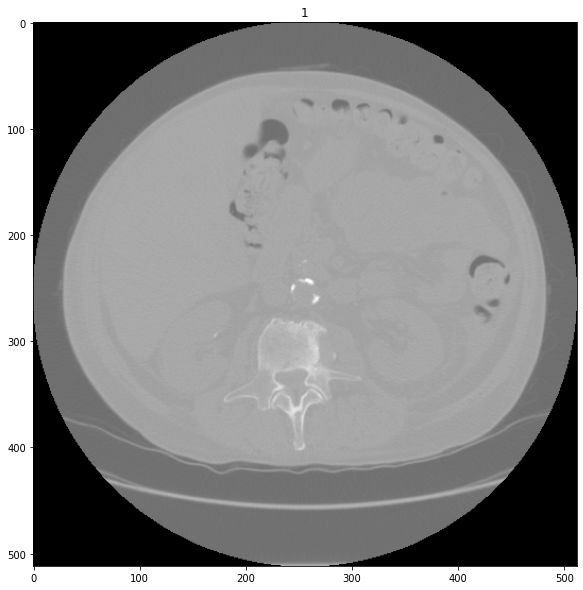

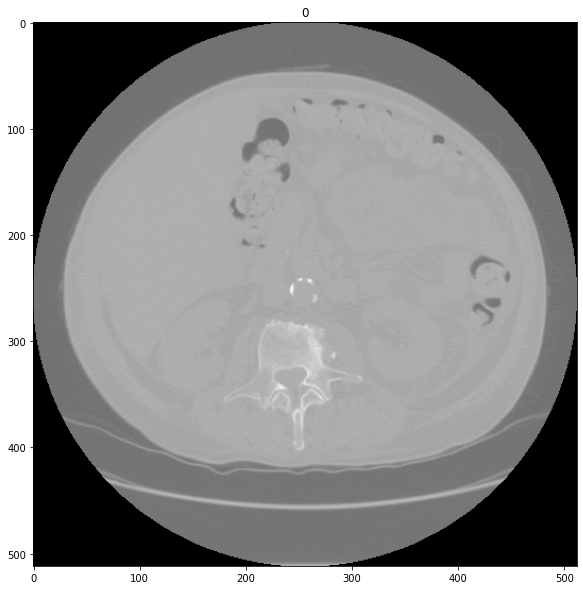

In [27]:
V.setCurrentIndex(5)
while V.hasPrev():
    S = V.getPrevSlice()
    
    plt.figure(figsize = (10, 10))
    plt.imshow(S, cmap = 'gray')
    plt.title(str(V.getCurrentIndex()))
    plt.show()

In [28]:
# Iterations change current index value!

In [29]:
# Access to random slice

In [30]:
print(V.getCurrentIndex())
S = V.getSlice(100)
print(V.getCurrentIndex())

0
0


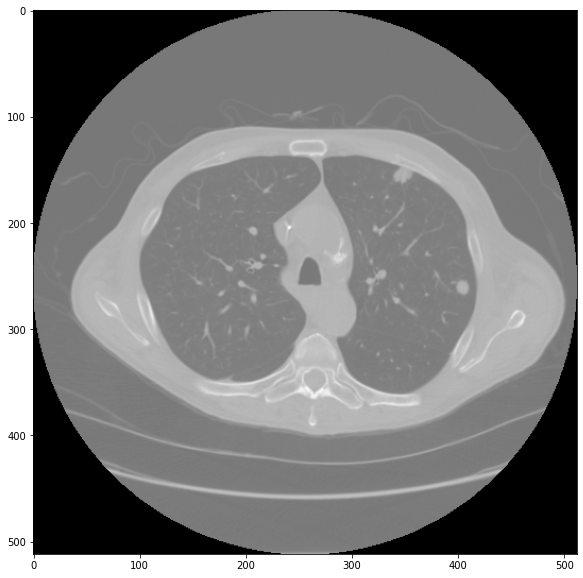

In [31]:
plt.figure(figsize = (10, 10))
plt.imshow(S, cmap = 'gray')
plt.show()

In [32]:
# Method getSlice doesn't change value of the current index!

In [33]:
# MIP

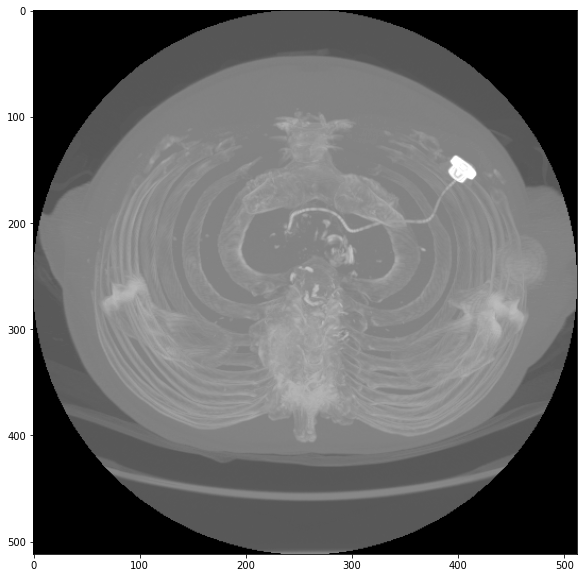

In [34]:
S = V.getMIP()

plt.figure(figsize = (10, 10))
plt.imshow(S, cmap = 'gray')
plt.show()

In [35]:
# We can create volume storage with standart progections: use True for initStandarView (or skip it)
# and use False or True for verticalFlip (or skip it in case of True)

In [36]:
VS = VolumeStorage(voxeldata, header['space'],
                   spacing = header['space directions'][np.diag_indices(3)],
                   initStandarView = True, # defailt value is True
                   verticalFlip = True # defailt value is True
                  )

In [37]:
print(VS.getViews().keys())

dict_keys(['frontal', 'lateral', 'axial'])


{'view': 'posterior', 'up': 'superior'}


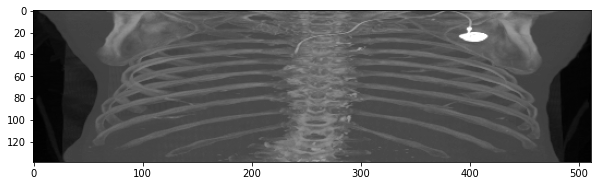

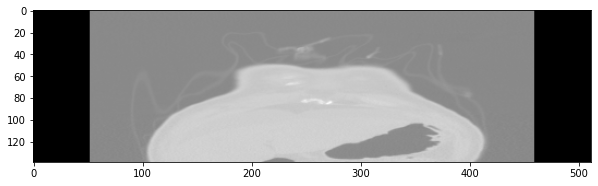

{'view': 'right', 'up': 'superior'}


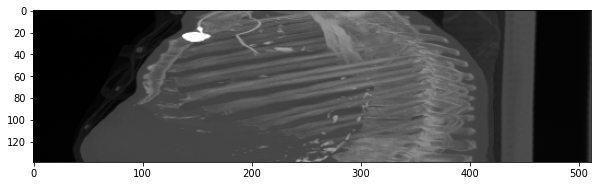

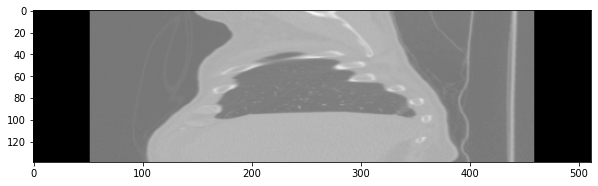

{'view': 'inferior', 'up': 'anterior'}


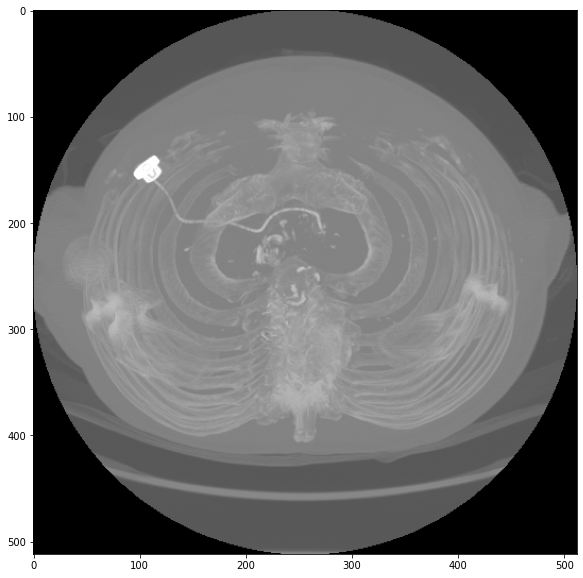

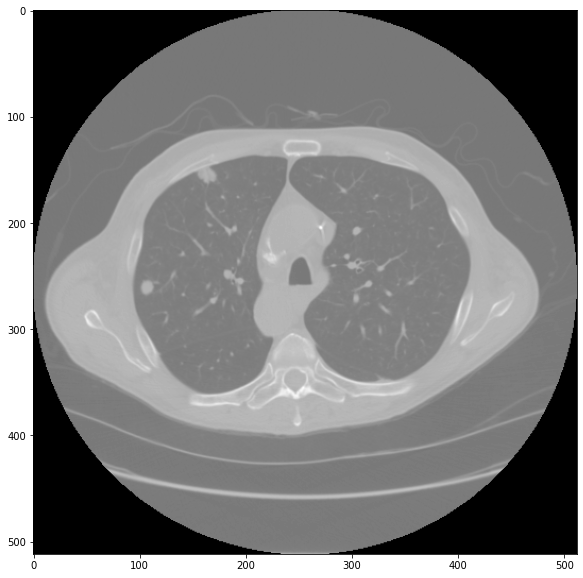

In [38]:
for k in VS.getViews().keys():
    
    print(VS.getViews()[k].getDirectionNames())
    
    plt.figure(figsize = (10, 10))
    plt.imshow(VS.getViews()[k].getMIP(), cmap = 'gray')
    plt.show()
    
    plt.figure(figsize = (10, 10))
    plt.imshow(VS.getViews()[k].getSlice(100), cmap = 'gray')
    plt.show()

In [39]:
# Frontal and lateral views are "compressed" along the vertical axis.
# It is because voxel size is not equal along different axes.

In [40]:
print('directions:', header['space'])
print('spacing data\n',  header['space directions'])

directions: left-posterior-superior
spacing data
 [[0.76171899 0.         0.        ]
 [0.         0.76171899 0.        ]
 [0.         0.         2.5       ]]


In [41]:
# We can correct images size using interpolation.
# If the voxel sizes differ along the projection axes, 
# we must stretch the projection image along the axis 
# with the larger voxel size. 
# New pixel values are being calculated by interpolation.
# Three interpolation models are available: 
# linear, 
# 3 degree spline interpolation and
# 3 degree spline approximation.

In [42]:
# Create VolumeStorage with spacing data.
# Variable spacing should be numpy array with 3 positive elements.
# Default value is [1, 1, 1]

In [43]:
VS = VolumeStorage(voxeldata, header['space'],
                   spacing = header['space directions'][np.diag_indices(3)],
                   initStandarView = False, # defailt value is True
                   verticalFlip = False # defailt value is True
                  )

In [44]:
VS.addView(name = 'FR', viewDirection = 'posterior', 
           upDirection = 'superior')

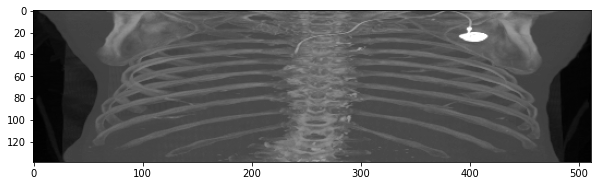

In [45]:
plt.figure(figsize = (10, 10))
plt.imshow(VS.getViews()['FR'].getMIP(), cmap = 'gray')
plt.show()

In [46]:
# Set/change interpolation model

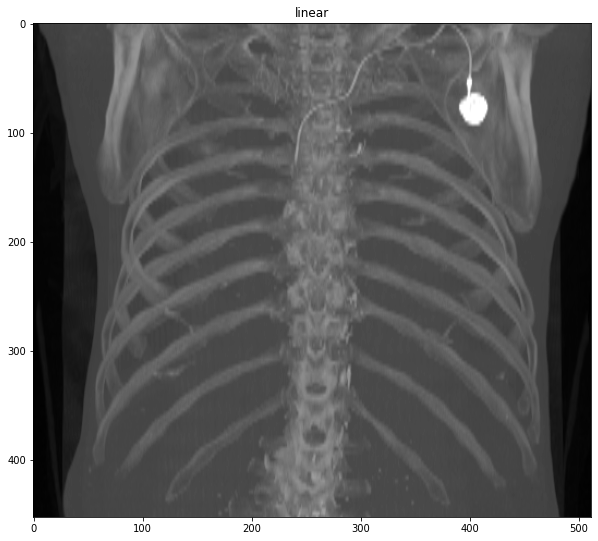

In [47]:
VS.getViews()['FR'].setInterpolationModel('L')

plt.figure(figsize = (10, 10))
plt.imshow(VS.getViews()['FR'].getMIP(), cmap = 'gray')
plt.title('linear')
plt.show()

In [48]:
# How linear interpolation is used

In [49]:
# For to set interpolation models the next keys should be used:
# 'none' - without interpoaltion
# 'L' or 'linear' - linear interpolation
# 'A' or 'approximation' - approximation by 3 degree splines
# 'I' or 'interpolation' - interpolation by 3 degree splines

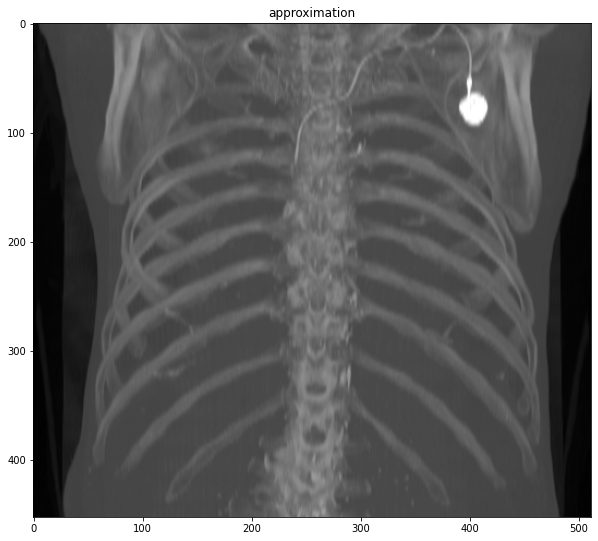

In [50]:
VS.getViews()['FR'].setInterpolationModel('A')

plt.figure(figsize = (10, 10))
plt.imshow(VS.getViews()['FR'].getMIP(), cmap = 'gray')
plt.title('approximation')
plt.show()

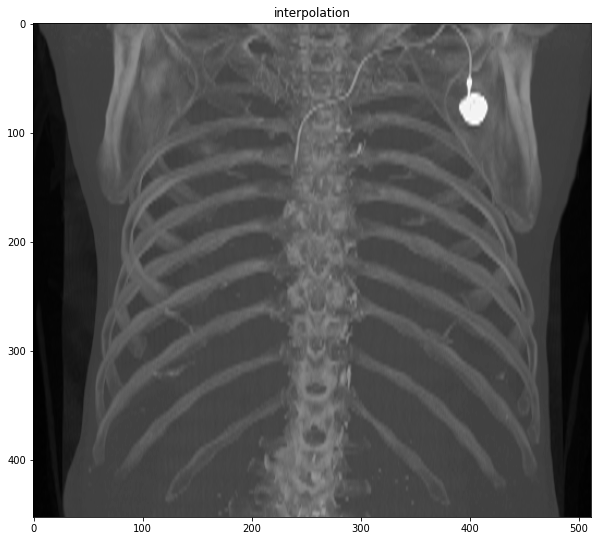

In [51]:
VS.getViews()['FR'].setInterpolationModel('interpolation')

plt.figure(figsize = (10, 10))
plt.imshow(VS.getViews()['FR'].getMIP(), cmap = 'gray')
plt.title('interpolation')
plt.show()

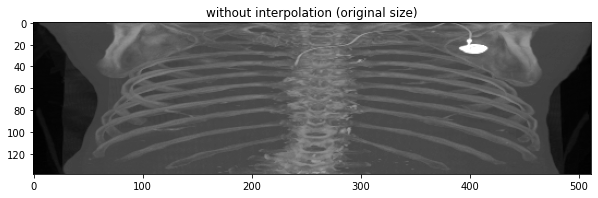

In [52]:
VS.getViews()['FR'].setInterpolationModel('none')

plt.figure(figsize = (10, 10))
plt.imshow(VS.getViews()['FR'].getMIP(), cmap = 'gray')
plt.title('without interpolation (original size)')
plt.show()

In [53]:
# We can check current interpolation model

In [54]:
print(VS.getViews()['FR'].getInterpolationModel())

none


In [55]:
# We can make view already with interpolation model

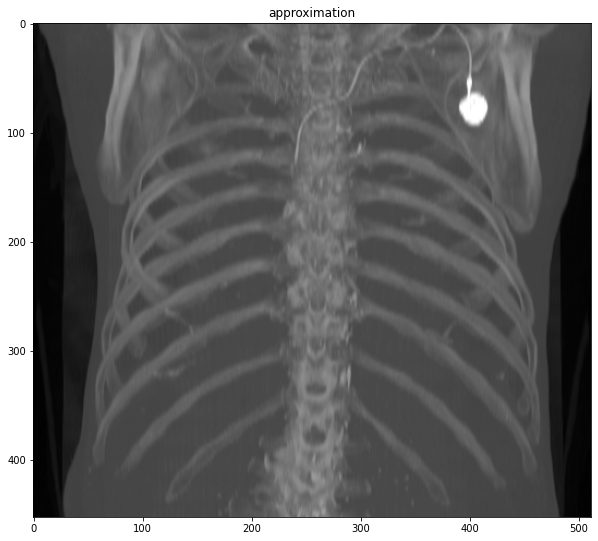

In [56]:
VS.addView(name = 'FR-A', viewDirection = 'posterior', 
           upDirection = 'superior', interpModel = 'approximation')
# default value of interpModel argument is 'none'

plt.figure(figsize = (10, 10))
plt.imshow(VS.getViews()['FR-A'].getMIP(), cmap = 'gray')
plt.title('approximation')
plt.show()

In [57]:
# It also can be changed

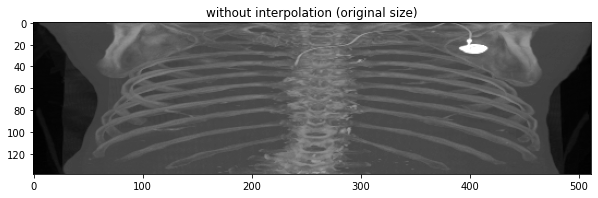

In [58]:
VS.getViews()['FR-A'].setInterpolationModel('none')

plt.figure(figsize = (10, 10))
plt.imshow(VS.getViews()['FR-A'].getMIP(), cmap = 'gray')
plt.title('without interpolation (original size)')
plt.show()

In [59]:
# Standart views with interpolation

In [60]:
VS = VolumeStorage(voxeldata, header['space'],
                   spacing = header['space directions'][np.diag_indices(3)],
                   initStandarView = True,
                   interpModel = 'approximation',
                   verticalFlip = True
                  )

# default value of interpModel argument is 'none'

{'view': 'posterior', 'up': 'superior'}
approximation


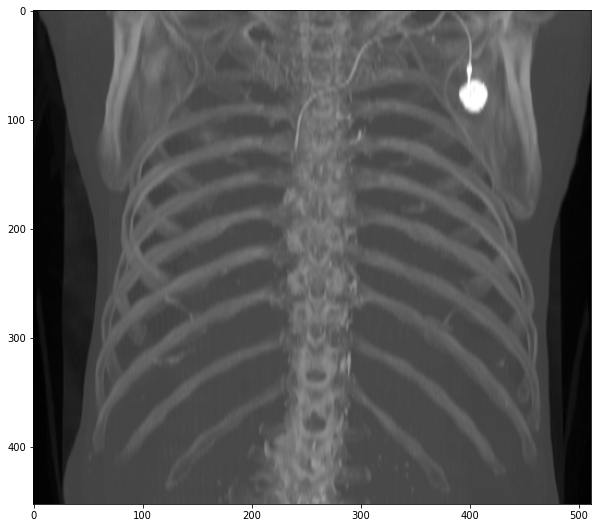

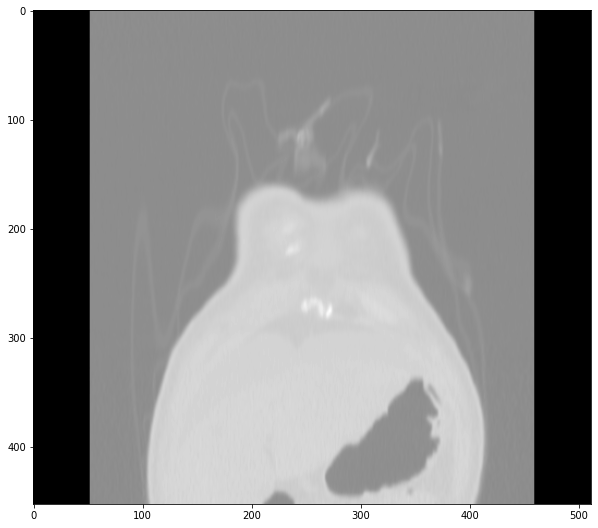

{'view': 'right', 'up': 'superior'}
approximation


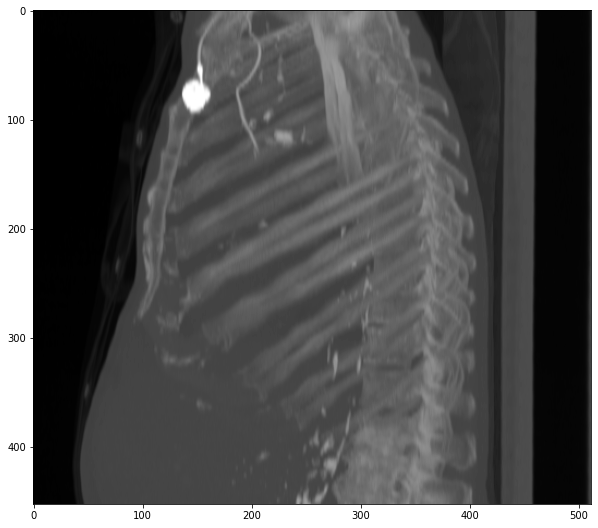

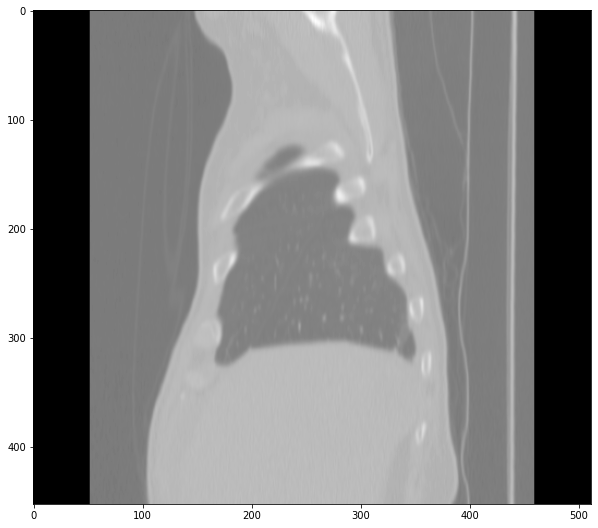

{'view': 'inferior', 'up': 'anterior'}
approximation


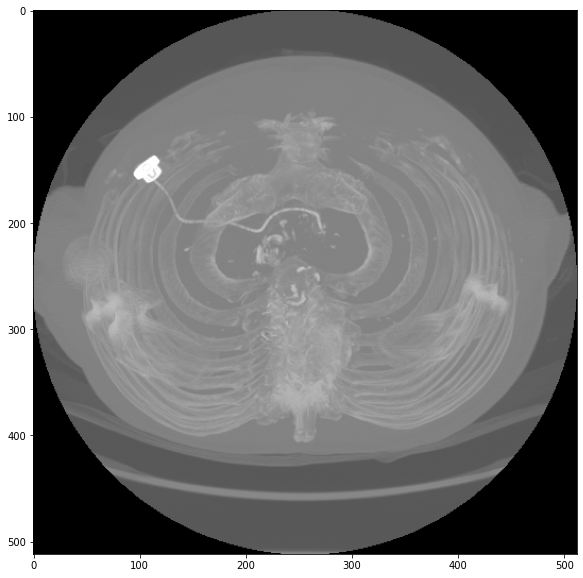

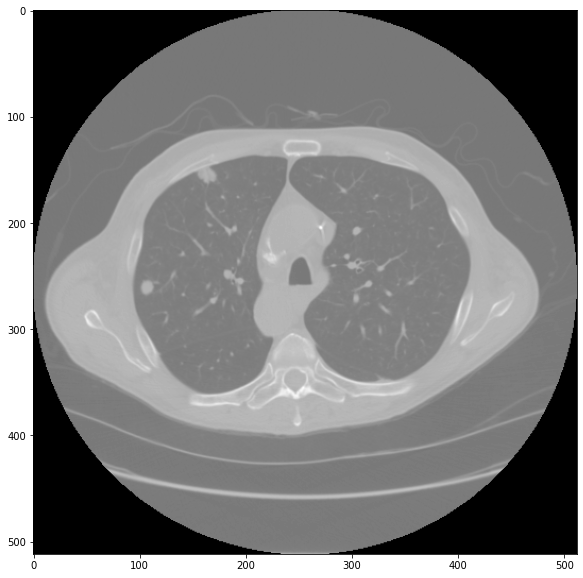

In [61]:
for k in VS.getViews().keys():
    
    print(VS.getViews()[k].getDirectionNames())
    print(VS.getViews()[k].getInterpolationModel())
    
    plt.figure(figsize = (10, 10))
    plt.imshow(VS.getViews()[k].getMIP(), cmap = 'gray')
    plt.show()
    
    plt.figure(figsize = (10, 10))
    plt.imshow(VS.getViews()[k].getSlice(100), cmap = 'gray')
    plt.show()